# Maze-A-Pix Puzzle

In [2]:
import random
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import math
import numpy as np
import os
from matplotlib.pyplot import MultipleLocator
from matplotlib.patches import Rectangle


READING FILE ../assets/data/Maze-a-pix/60x40_1.txt


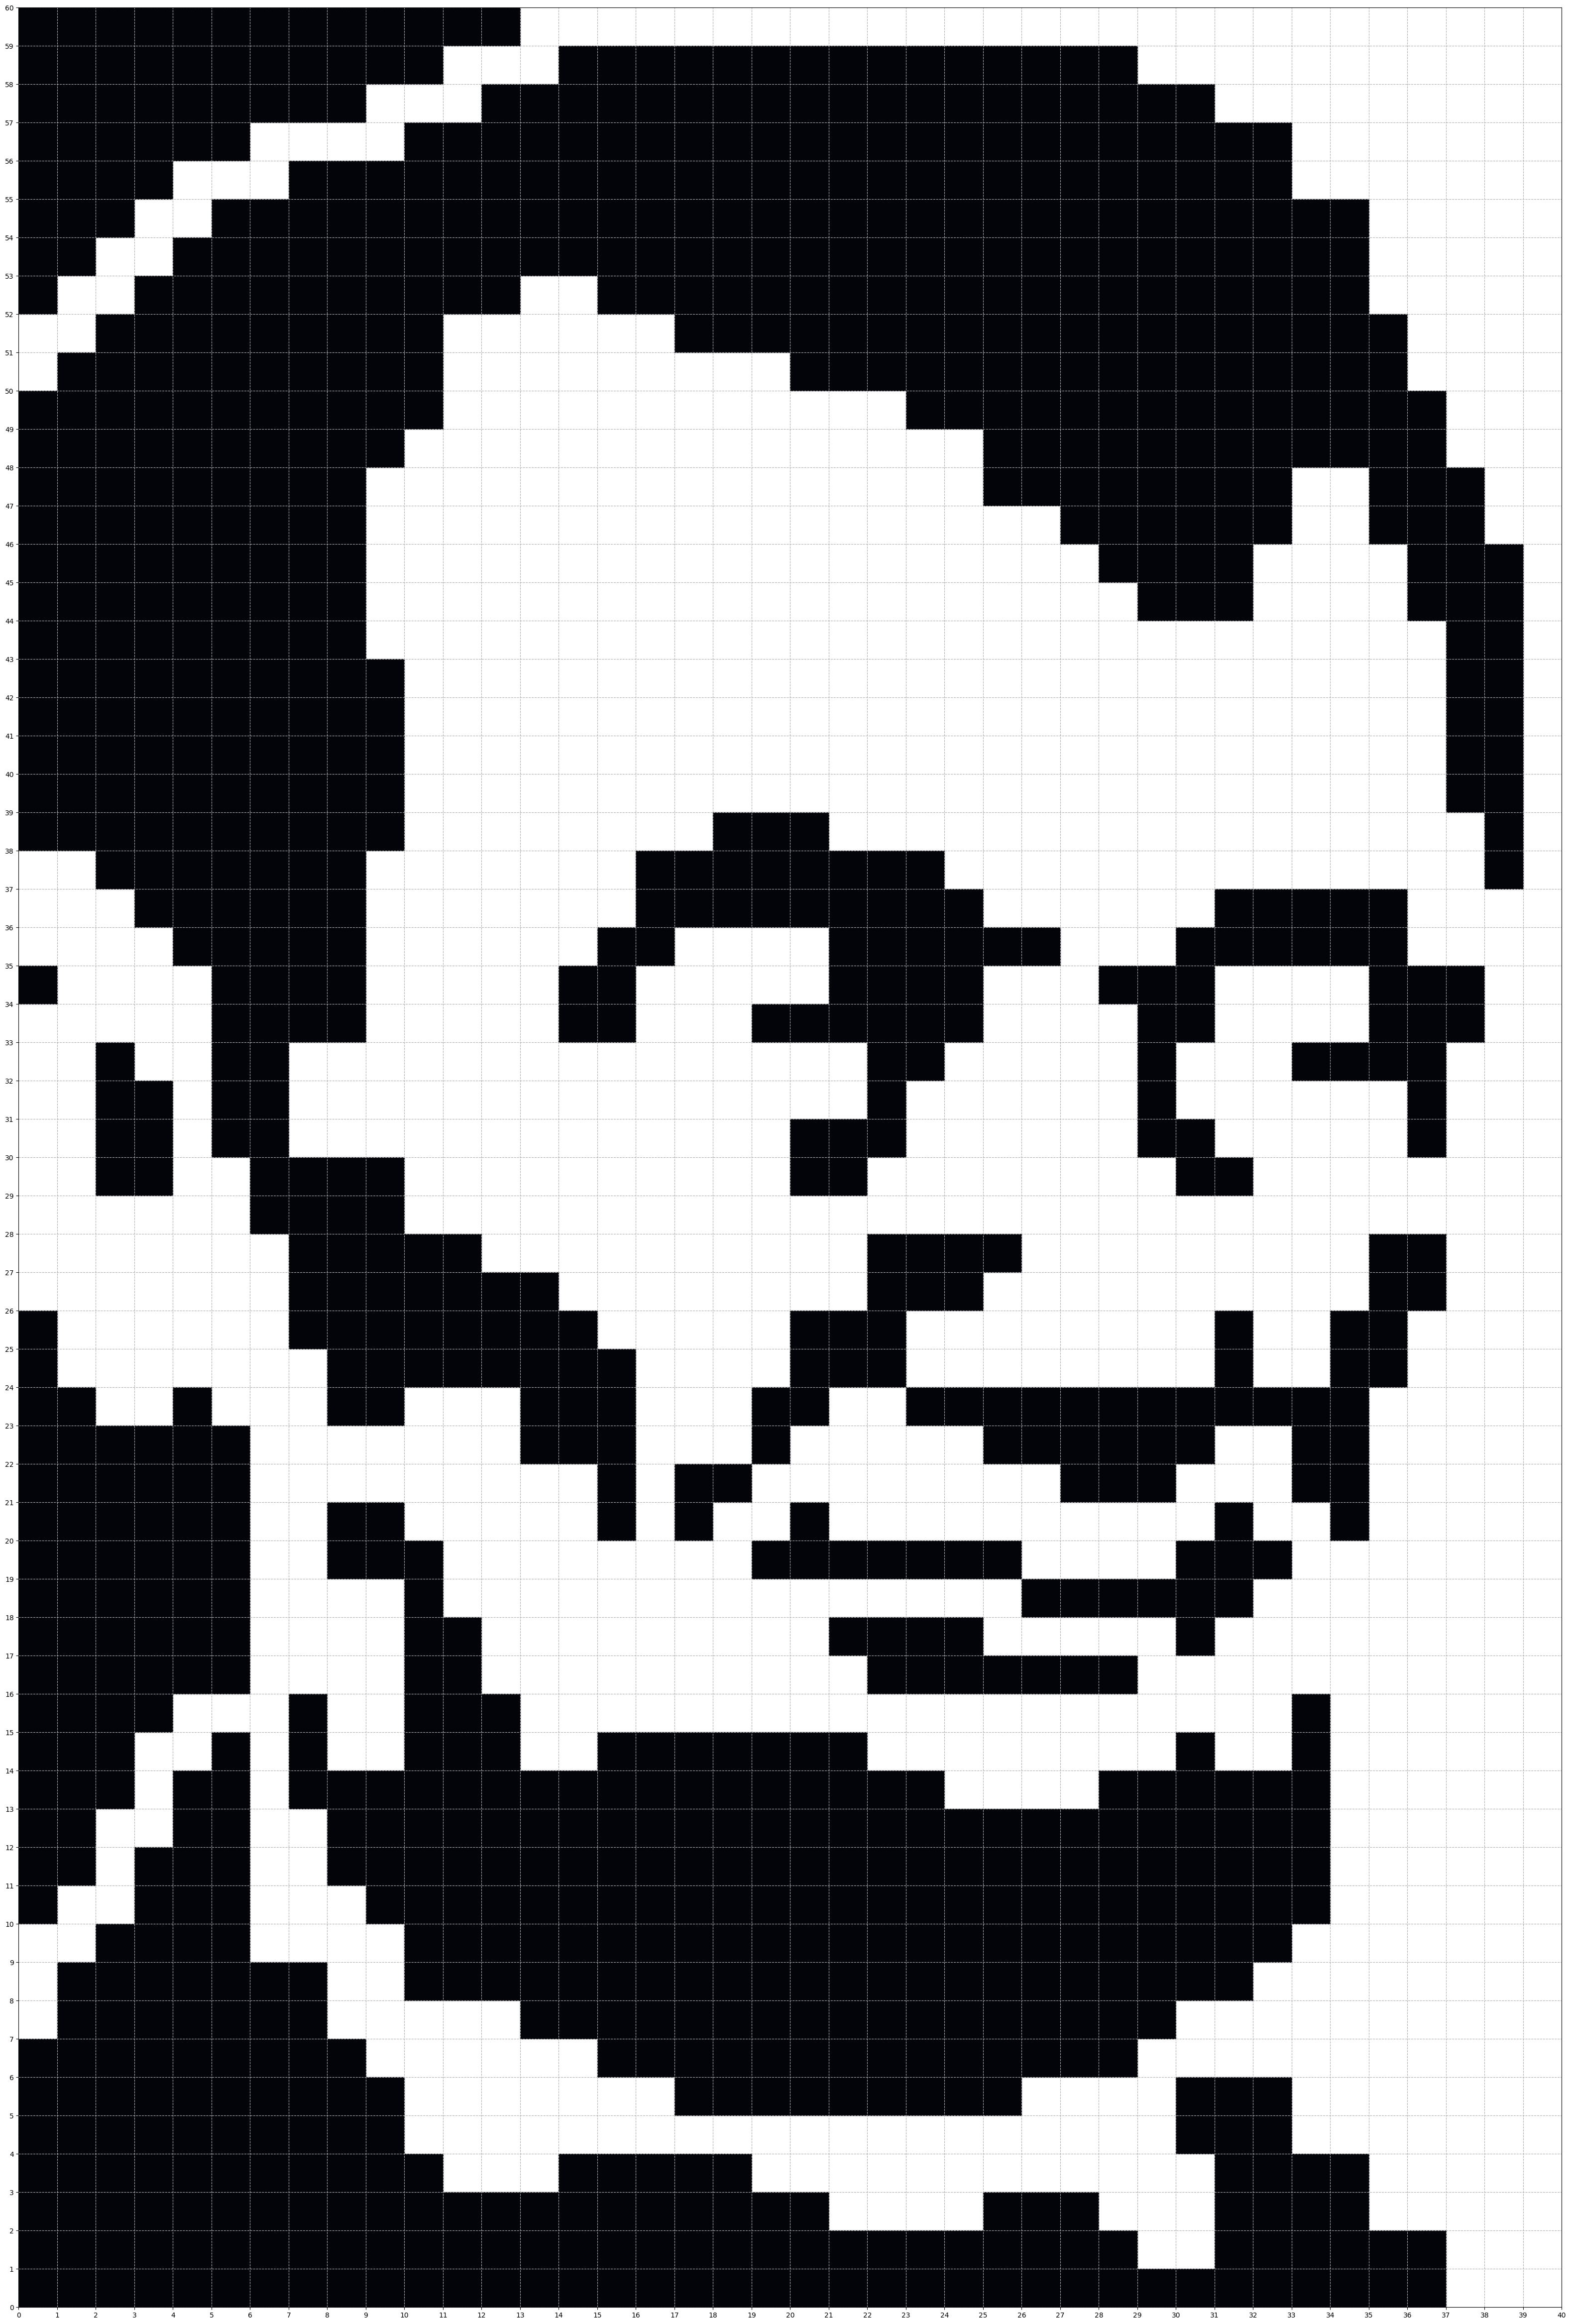

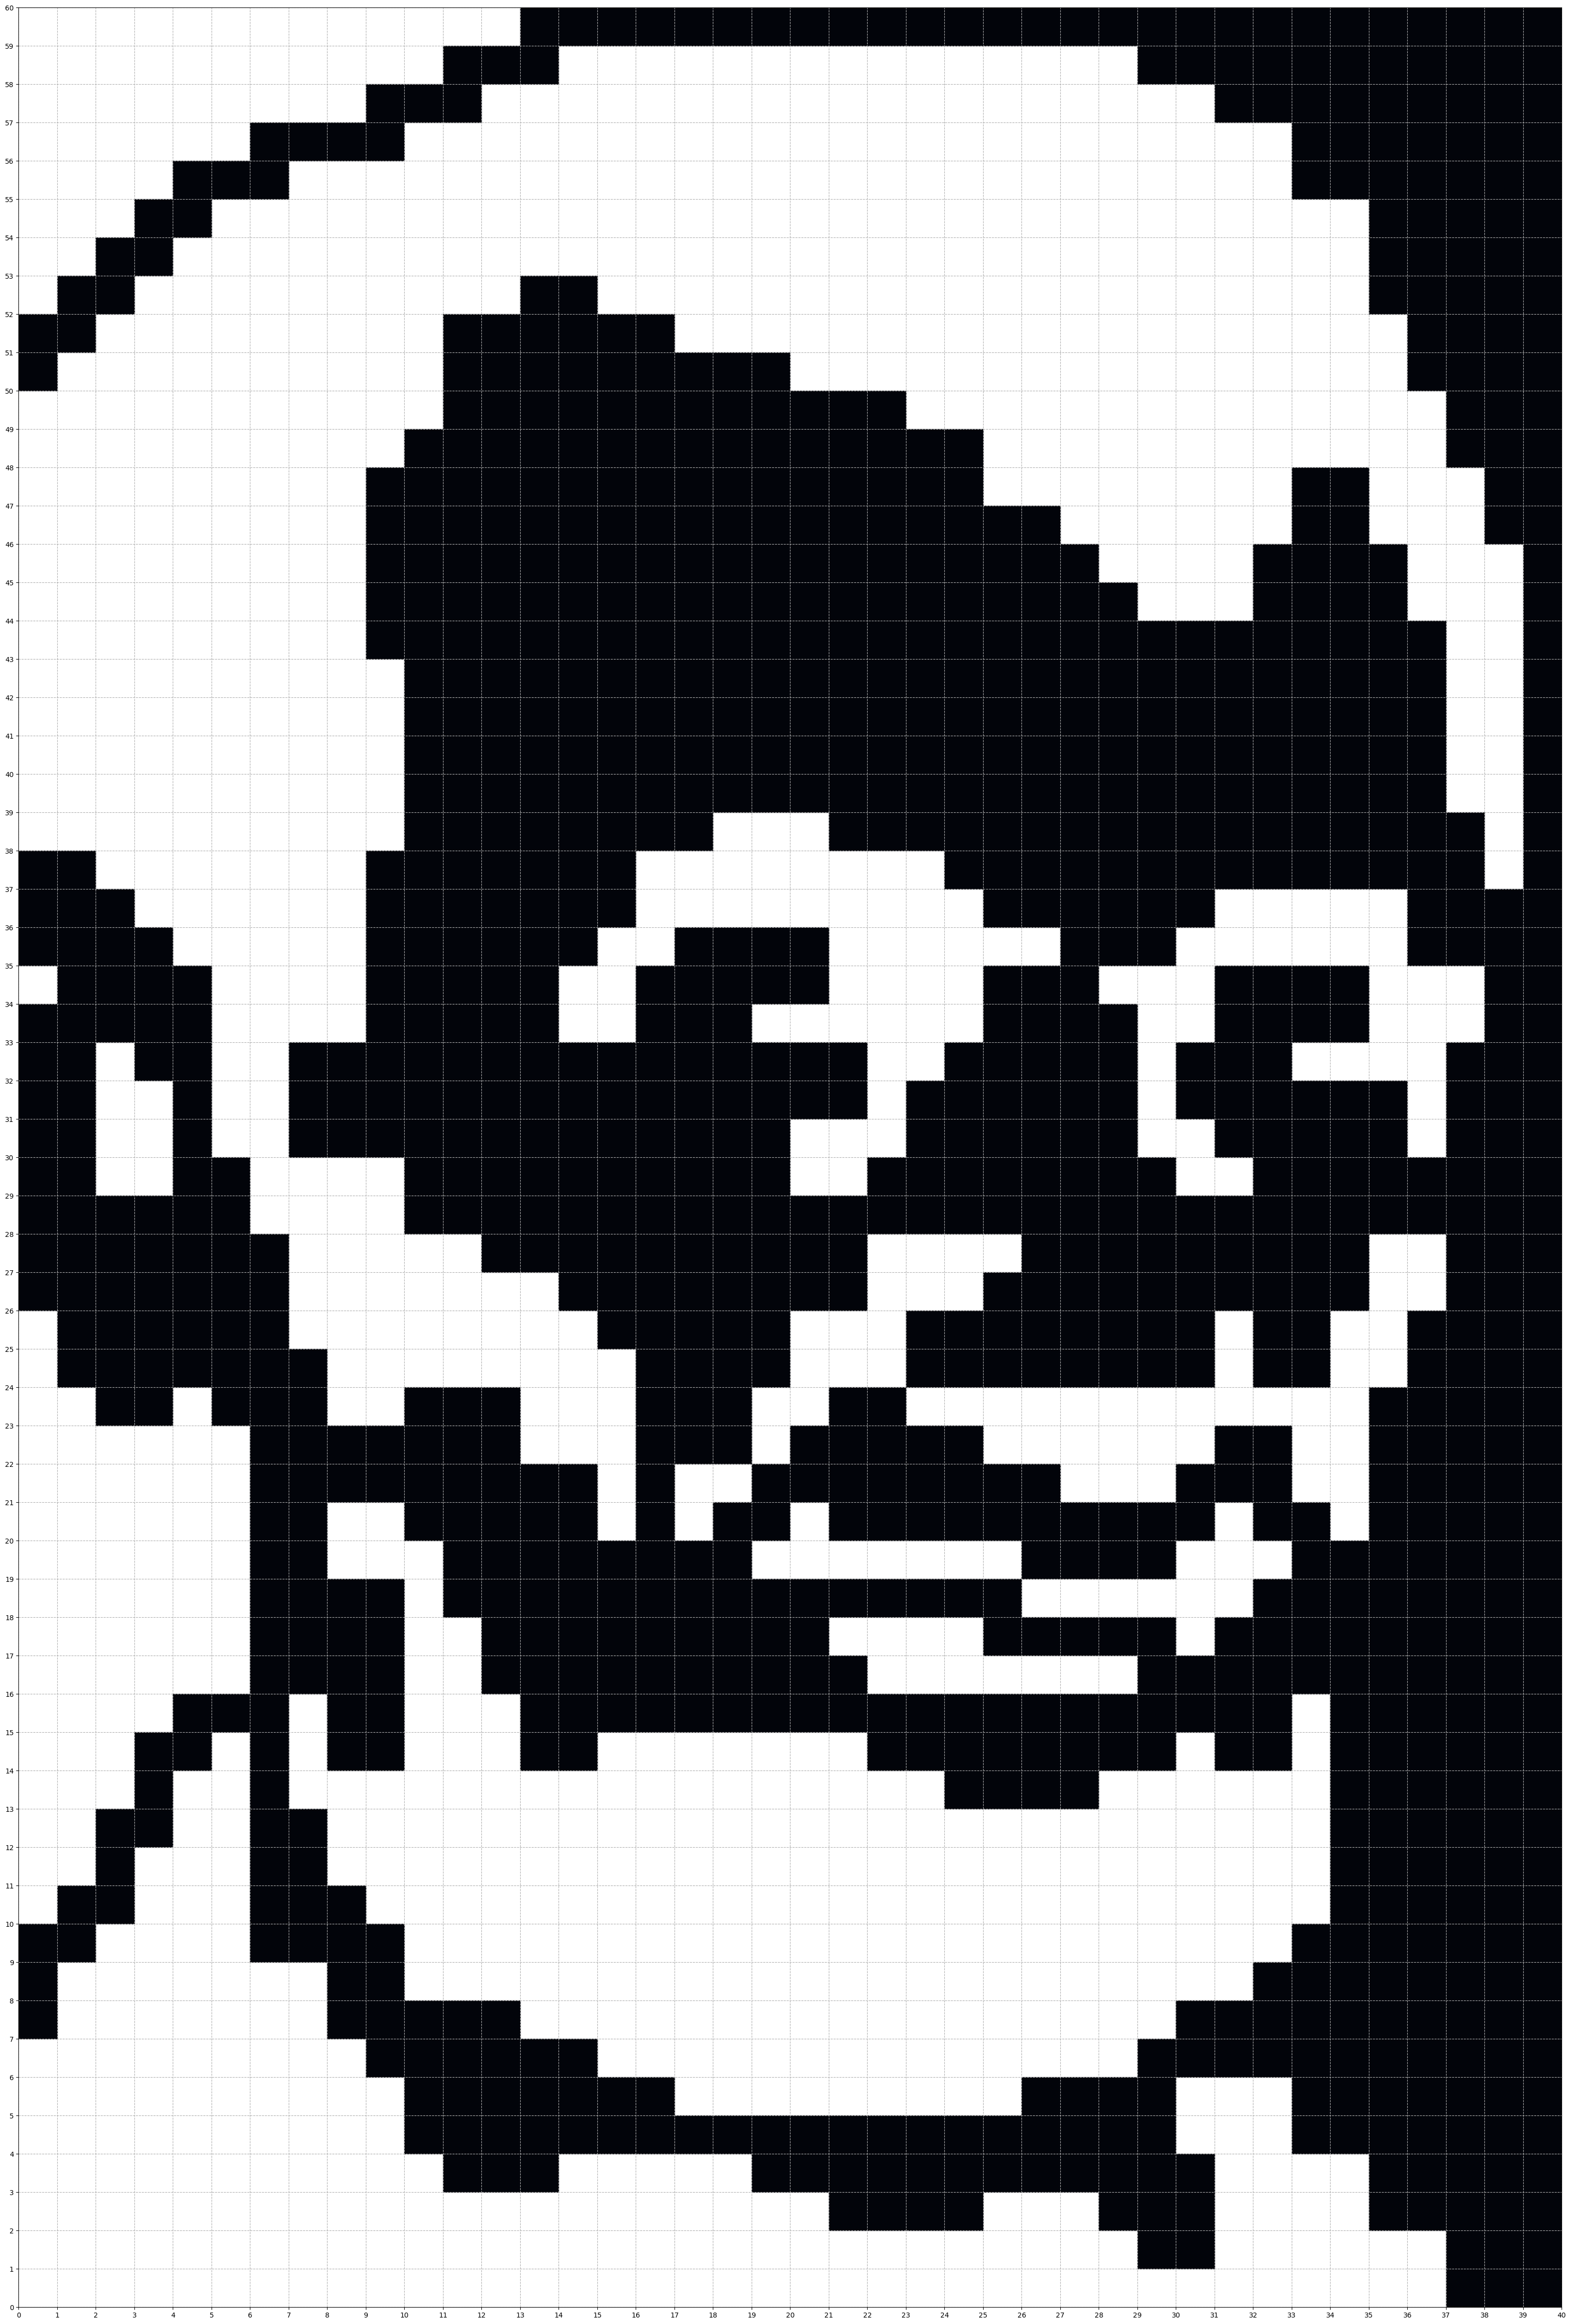

In [26]:


def visual(X, Y, grid, result, convert = False):
    plt.figure(figsize = (Y, X))
    ax = plt.gca()
    x_major_locator = MultipleLocator(1)
    y_major_locator = MultipleLocator(1)
    ax.xaxis.set_major_locator(x_major_locator)
    ax.yaxis.set_major_locator(y_major_locator)
    plt.xlim(0,Y)
    plt.ylim(0,X)
    plt.grid(linestyle = "--")
    if not convert:
        for coords in result:
            xy = coords.split(",")
            i , j = int(xy[0]), int(xy[1])

            ax.add_patch(Rectangle((j, X - i - 1), 1, 1, color = "#02040A"))
    else:
        for i in range(X):
            for j in range(Y):
                if f"{i},{j}" not in result:
                    ax.add_patch(Rectangle((j, X - i - 1), 1, 1, color = "#02040A"))
                    
    plt.show()

def readInstance(path):
    
    # 从测试案例中随机选取一个测试案例出来
    # file_name = f"../assets/data/GrandTourSolverdata/{path}{np.random.randint(1)+1}.txt"
    file_name = f"../assets/data/Maze-a-pix/{path}.txt"
    m = 0
    n = 0
    grids = None
    print( f"READING FILE {file_name}" )
    if not os.path.isfile(file_name):
        print('File does not exist')
    else:
        with open(file_name) as file:
            firstline = file.readline().strip().split(" ")
            m = int(firstline[0])
            n = int(firstline[1])
            grids = [[0 for _ in range(n)] for _ in range(m)]
            secondline = file.readline().strip().split(" ")
            original = [int(secondline[0]), int(secondline[1])]
            destination = [int(secondline[2]), int(secondline[3])]
            for idx in range(m):
                line = file.readline().strip().split(" ")
                assert len(line) == n
                for j in range(n):
                    if line[j] not in ['-']:
                        grids[idx][j] = int(line[j])
    return m, n, grids, original, destination

def MazeAPixSolver(m, n, grids, original, destination):
    edges = []
    for i in range(m):
        for j in range(n):
            if grids[i][j] == 0:
                if j + 1 < n:
                    # print(f"{i},{j}", f"{i},{j + 1}")
                    edges.append((f"{i},{j}", f"{i},{j + 1}", 1))
                if i + 1 < m:
                    edges.append((f"{i},{j}", f"{i + 1},{j}", 1))
            elif grids[i][j] == 1:
                if i + 1 < m:
                    edges.append((f"{i},{j}", f"{i + 1},{j}", 1))
            elif grids[i][j] == 2:
                if j + 1 < n:
                    edges.append((f"{i},{j}", f"{i},{j + 1}", 1))
            elif grids[i][j] == 3:
                continue
    
    G = nx.Graph()
    # 添加边到图中
    G.add_weighted_edges_from(edges)

    # 求解从节点 'A' 到 'E' 的最短路径
    source = f"{original[0]},{original[1]}"
    target = f"{destination[0]},{destination[1]}"
    shortest_path = nx.shortest_path(G, source=source, target=target, weight='weight')
    shortest_path_length = nx.shortest_path_length(G, source=source, target=target, weight='weight')
    return shortest_path, shortest_path_length


if __name__ == "__main__":
    for data in ['25x25_1', "40x40_1", "45x45_1", "50x40_1", "60x40_1"][-1:]:

        m, n, grids, original, destination = readInstance(data)
        shortest_path, shortest_path_length = MazeAPixSolver(m, n, grids, original, destination)
        # visual(m, n, grids, shortest_path, convert = True)
        visual(m, n, grids, shortest_path, convert = True)
        visual(m, n, grids, shortest_path, convert = False)